In [10]:
#import packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime
import zipfile
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

In [4]:
#Read in dataframe
zf = zipfile.ZipFile("../../data/preprocessed_df.csv.zip") 
df = pd.read_csv(zf.open('preprocessed_df.csv'))
df.head()

,Unnamed: 0,float,latitude,longitude,cycleNumber,PRES,PSAL,TEMP,BBP700,CHLA,short_date,sat_chl,sat_sst,sat_poc,sat_bbp_443,sat_pic,sat_aph_443,sat_par,sat_bb_678,month,seasonality,norm_PSAL,norm_TEMP,norm_BBP700,norm_CHLA,norm_sat_chl,norm_sat_sst,norm_sat_poc,norm_sat_bbp_443,norm_sat_pic,norm_sat_aph_443,norm_sat_par,norm_sat_bb_678,PRES_binned
0,0,1902303,49.236,-14.742,1,3,35.539001,12.378333,0.001788,0.695875,2021-05-06,0.370203,12.61,94.600098,0.003215,0.000306,0.0357,27.891998,0.001995,5,2,0.930498,0.998830,0.958205,0.600702,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1902303,49.236,-14.742,1,4,35.539001,12.378333,0.001788,0.695875,2021-05-06,0.370203,12.61,94.600098,0.003215,0.000306,0.0357,27.891998,0.001995,5,2,0.930498,0.998830,0.958205,0.600702,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,1902303,49.236,-14.742,1,6,35.539001,12.378667,0.001788,0.696499,2021-05-06,0.370203,12.61,94.600098,0.003215,0.000306,0.0357,27.891998,0.001995,5,2,0.930498,0.998913,0.958205,0.601242,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,1902303,49.236,-14.742,1,8,35.539001,12.379000,0.001789,0.716489,2021-05-06,0.370203,12.61,94.600098,0.003215,0.000306,0.0357,27.891998,0.001995,5,2,0.930498,0.998997,0.958846,0.618520,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,1902303,49.236,-14.742,1,10,35.539001,12.379000,0.001790,0.715552,2021-05-06,0.370203,12.61,94.600098,0.003215,0.000306,0.0357,27.891998,0.001995,5,2,0.930498,0.998997,0.959487,0.617711,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


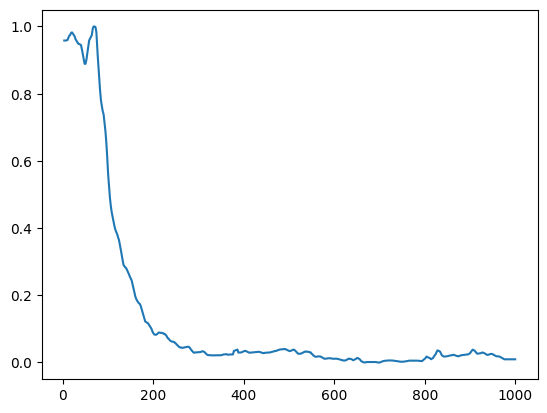

In [5]:
#explore the curve for one of the variables
test_df = df[df['float']==1902303]
for cycle in test_df['cycleNumber'].unique()[0:1]:
    test_df_cycle = test_df[test_df['cycleNumber']==cycle]
    plt.plot(test_df_cycle['PRES'], test_df_cycle['norm_BBP700'])
    # plt.plot(test_df_cycle['PRES'], test_df_cycle['BBP700'])
    plt.show()

# Curve Fitting
## Parametric

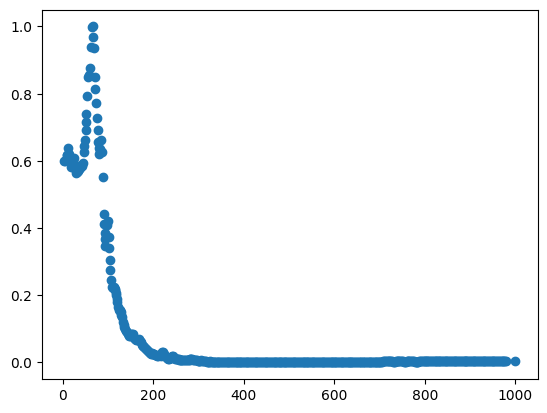

In [6]:
# Curve fitting
fit_df = df[(df['float']==1902303)&(df['cycleNumber']==1)]
xdata = np.asarray(fit_df['PRES'])
ydata = np.asarray(fit_df['norm_CHLA'])
plt.plot(xdata, ydata, 'o')

In [7]:
# def objective(x, a, b, c):
# 	return a * x + b
# # define the true objective function
# def objective_square(x, a, b, c):
# 	return a * x + b * x**2 + c
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
# define the true objective function
# def objective(x, a, b, c, d):
# 	return a * np.sin(b - x) + c * x**2 + d
def objective(x, a, b, c,d):
	return a*np.exp(-b*x) + c*np.exp(-d*x) 

0.45364174731209406 0.010238055690577483 0.45977787557454786 0.010238386107110198


/var/folders/8w/yzz7q0p146x4qrt7dwp0mhy40000gn/T/ipykernel_8584/951385558.py:13: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x) + c*np.exp(-d*x)
/var/folders/8w/yzz7q0p146x4qrt7dwp0mhy40000gn/T/ipykernel_8584/951385558.py:13: RuntimeWarning: invalid value encountered in add
  return a*np.exp(-b*x) + c*np.exp(-d*x)


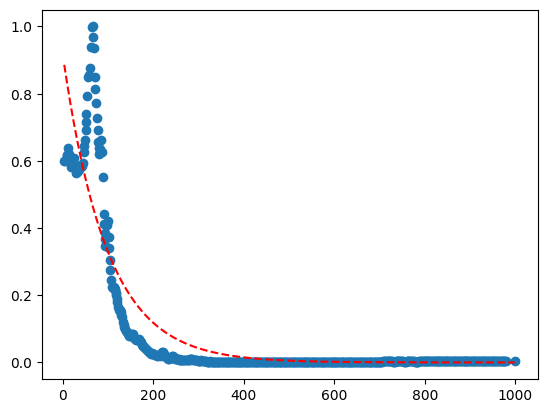

In [8]:
popt, _ = curve_fit(objective, xdata, ydata)
# summarize the parameter values
a, b, c, d = popt
print(a, b, c, d)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(xdata), max(xdata), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
plt.scatter(xdata, ydata)
plt.plot(x_line, y_line, '--', color='red')

/opt/anaconda3/envs/capstone/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/anaconda3/envs/capstone/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda3/envs/capstone/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


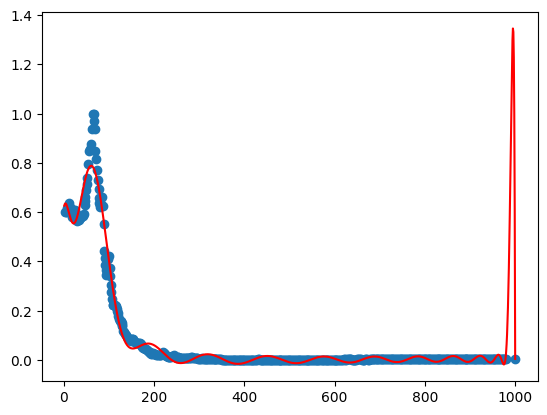

In [9]:
mymodel = np.poly1d(np.polyfit(xdata, ydata, 100))
myline = np.linspace(1, 1000, 1000)
plt.scatter(xdata, ydata)
plt.plot(myline, mymodel(myline),color='red')

## Non-parametric
Lowess Smoothing

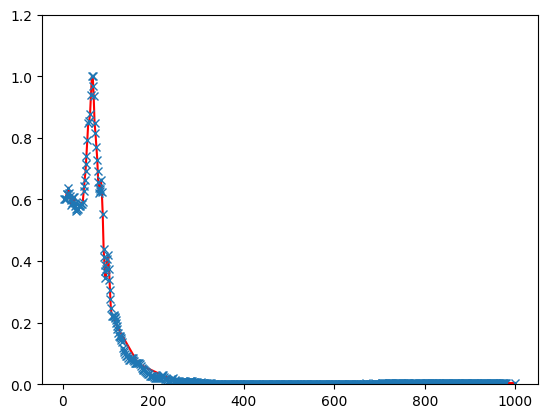

In [12]:
lowess = sm.nonparametric.lowess
z = lowess(ydata, xdata, frac=1/8)
# z1 = lowess(ydata, xdata, frac=1/7)
# _ = plt.plot(xdata, ydata)
_ = plt.plot(xdata, z, color='red')
# _ = plt.plot(xdata, z1, color='green')
_ = plt.ylim([0,1.2])
_ = plt.plot(xdata, ydata,'x')